In [1]:
# check the current python version, make sure this is the one that with HDDM correctly installed
import sys
sys.executable

'C:\\Users\\kalai\\Anaconda2\\python.exe'

In [2]:
%matplotlib inline
# Preparation
import os, hddm, time, csv
import datetime

# import the toolbox
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

# set the color of plots
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmykw')

C:\Users\kalai\Anaconda2\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [3]:
# load data from cateogriztion based on moral valence
dat_M_match = hddm.load_csv('coke_chn_hddm.csv')

dat_M_match.head(100)  

,subj_idx,Age,Name,Sex,SubTrial,Label,Brand,YesNoResp,Procedure[Block],response,match,stim,fans,rt,cong,preference
0,96,19,helang,male,50,friend,pepsi,No,unmatchProc,1,unmatch,0,pepei_fans,0.200,cong,6.0
1,96,19,helang,male,24,friend,circle,Yes,unmatchProc,1,match,1,pepei_fans,0.201,cong,6.0
2,96,19,helang,male,32,self,pepsi,Yes,unmatchProc,0,match,1,pepei_fans,0.206,cong,6.0
3,96,19,helang,male,39,friend,coca,No,unmatchProc,1,unmatch,0,pepei_fans,0.208,cong,6.0
4,96,19,helang,male,53,stranger,coca,Yes,unmatchProc,1,match,1,pepei_fans,0.209,cong,6.0
5,96,19,helang,male,39,self,pepsi,Yes,unmatchProc,1,match,1,pepei_fans,0.210,cong,6.0
6,96,19,helang,male,34,self,pepsi,Yes,unmatchProc,1,match,1,pepei_fans,0.211,cong,6.0
7,96,19,helang,male,42,stranger,pepsi,No,unmatchProc,1,unmatch,0,pepei_fans,0.214,cong,6.0
8,96,19,helang,male,52,friend,pepsi,No,unmatchProc,1,unmatch,0,pepei_fans,0.217,cong,6.0
9,96,19,helang,male,37,friend,coca,No,unmatchProc,1,unmatch,0,pepei_fans,0.217,cong,6.0


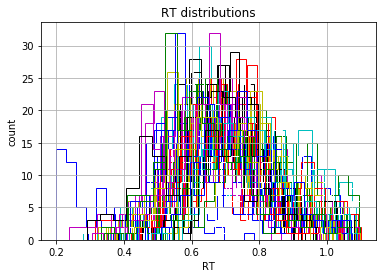

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dat_M_match.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('distribution.pdf')

In [25]:
nsample = 10000  # number of sampling
nburn   = 1000     # number of burn

# dateToday = str(date.today())  # replace the code below if you prefer using the actual date
dateToday = 'final' # using final in the saved file name

#### Model 1

In [17]:
start_time = time.time()  # the start time of the processing
 
import warnings           # suppress the warnings
warnings.simplefilter('ignore')

dbname = "M_match_m1_" 
M_match_m1 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','fans','cong','match'],'z':['Label','fans','cong','match']},
                                    split_param='v', 
                                    drift_criterion=False,
                                  p_outlier=0.05)
                            

M_match_m1.find_starting_values()
M_match_m1.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m1.save(dbname)
print("M_match_m1_selfie DIC: %f" %M_match_m1.dic) # DIC: -6555.170198

 [-----------------100%-----------------] 20001 of 20000 complete in 59383.0 secM_match_m1_selfie DIC: -5180.976895


In [ ]:
ppc_data_match_m1 = hddm.utils.post_pred_gen(M_match_m1)
ppc_compare_match_m1 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m1)  # MSE 
ppc_compare_match_m1.to_csv('ppc_compare_match_m1_coke.csv', sep = ',')

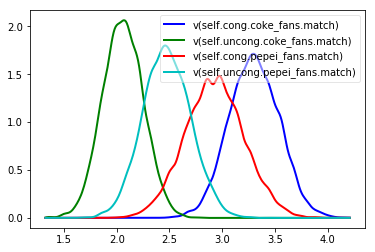

In [23]:
v1,v2,v3,v4=M_match_m1.nodes_db.node[['v(self.cong.coke_fans.match)','v(self.uncong.coke_fans.match)','v(self.cong.pepei_fans.match)','v(self.uncong.pepei_fans.match)']]
hddm.analyze.plot_posterior_nodes([v1,v2,v3,v4])
plt.savefig('coke_m1_v')

In [10]:
print "P_(v1>v2)=",(v1.trace()>v2.trace()).mean() #coke cong vs incong
print "P_(v3>v4)=",(v3.trace()>v4.trace()).mean() #pepsi cong vs incong
print "P_(v1>v3)=",(v1.trace()>v3.trace()).mean() #coke cong vs pepsi cong
print "P_(v2>v4)=",(v2.trace()>v4.trace()).mean() #coke incong vs. pepsi incong


P_(v1>v2)= 0.9998888888888889
P_(v3>v4)= 0.8955555555555555
P_(v1>v3)= 0.8383333333333334
P_(v2>v4)= 0.08222222222222222


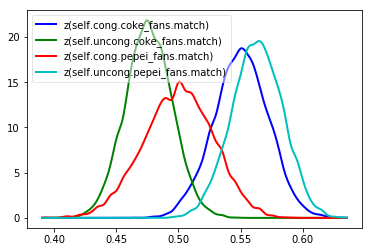

In [24]:
z1,z2,z3,z4=M_match_m1.nodes_db.node[['z(self.cong.coke_fans.match)','z(self.uncong.coke_fans.match)','z(self.cong.pepei_fans.match)','z(self.uncong.pepei_fans.match)']]
hddm.analyze.plot_posterior_nodes([z1,z2,z3,z4])
plt.savefig('coke_m1_z')

In [19]:
print "P_(z1>z2)=",(z1.trace()>z2.trace()).mean() #coke cong vs incong
print "P_(z3<z4)=",(z3.trace()<z4.trace()).mean() #pepsi cong vs incong
print "P_(z1>z3)=",(z1.trace()>z3.trace()).mean() #coke cong vs pepsi cong
print "P_(z2>z4)=",(z2.trace()>z4.trace()).mean() #coke incong vs. pepsi incong

P_(z1>z2)= 0.9941666666666666
P_(z3<z4)= 0.9672222222222222
P_(z1>z3)= 0.9216666666666666
P_(z2>z4)= 0.0011666666666666668


#### Model 2

In [26]:
dbname = "M_match_m2_" 
M_match_m2 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','fans','cong','match'],'z':['Label','fans','cong','match'],'t':['Label','fans','cong','match']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m2.find_starting_values()
M_match_m2.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m2.save(dbname)
print("M_match_m2_coke DIC: %f" %M_match_m2.dic) #DIC: -6544.182629

 [-----------------100%-----------------] 10001 of 10000 complete in 33000.0 secM_match_m2_selfie DIC: -6591.006086


In [ ]:
subj_data=M_match_m2.get_subj_nodes()
subj_data.to_csv('coke2.csv')

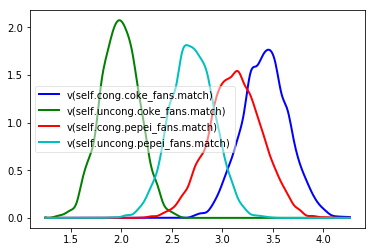

In [38]:
v1,v2,v3,v4=M_match_m2.nodes_db.node[['v(self.cong.coke_fans.match)','v(self.uncong.coke_fans.match)','v(self.cong.pepei_fans.match)','v(self.uncong.pepei_fans.match)']]
hddm.analyze.plot_posterior_nodes([v1,v2,v3,v4])
plt.savefig('coke_m2_v')

In [39]:
print "P_(v1>v2)=",(v1.trace()>v2.trace()).mean()
print "P_(v3>v4)=",(v3.trace()>v4.trace()).mean()
print "P_(v1>v3)=",(v1.trace()>v3.trace()).mean()
print "P_(v2>v4)=",(v2.trace()>v4.trace()).mean()

P_(v1>v2)= 1.0
P_(v3>v4)= 0.8856666666666667
P_(v1>v3)= 0.7934444444444444
P_(v2>v4)= 0.009333333333333334


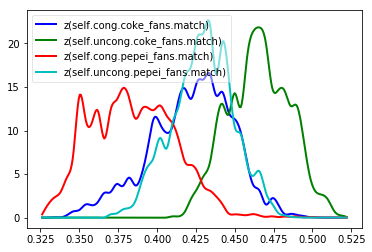

In [40]:
z1,z2,z3,z4=M_match_m2.nodes_db.node[['z(self.cong.coke_fans.match)','z(self.uncong.coke_fans.match)','z(self.cong.pepei_fans.match)','z(self.uncong.pepei_fans.match)']]
hddm.analyze.plot_posterior_nodes([z1,z2,z3,z4])
plt.savefig('coke_m2_z')

In [41]:
print "P_(z1>z2)=",(z1.trace()>z2.trace()).mean() #coke cong vs incong
print "P_(z3<z4)=",(z3.trace()<z4.trace()).mean() #pepsi cong vs incong
print "P_(z1>z3)=",(z1.trace()>z3.trace()).mean() #coke cong vs pepsi cong
print "P_(z2>z4)=",(z2.trace()>z4.trace()).mean() #coke incong vs. pepsi incong

P_(z1>z2)= 0.07722222222222222
P_(z3<z4)= 0.9135555555555556
P_(z1>z3)= 0.8064444444444444
P_(z2>z4)= 0.8624444444444445


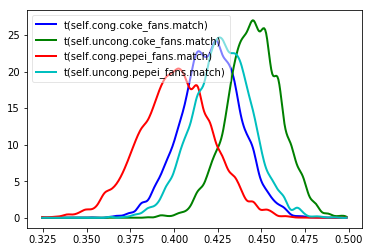

In [42]:
t1,t2,t3,t4=M_match_m2.nodes_db.node[['t(self.cong.coke_fans.match)','t(self.uncong.coke_fans.match)','t(self.cong.pepei_fans.match)','t(self.uncong.pepei_fans.match)']]
hddm.analyze.plot_posterior_nodes([t1,t2,t3,t4])
plt.savefig('coke_m2_t')

In [43]:
print "P_(t1>t2)=",(t1.trace()>t2.trace()).mean() #coke cong vs incong
print "P_(t3<t4)=",(t3.trace()<t4.trace()).mean() #pepsi cong vs incong
print "P_(t1>t3)=",(t1.trace()>t3.trace()).mean() #coke cong vs pepsi cong
print "P_(t2>t4)=",(t2.trace()>t4.trace()).mean() #coke incong vs. pepsi incong

P_(t1>t2)= 0.1361111111111111
P_(t3<t4)= 0.8402222222222222
P_(t1>t3)= 0.7694444444444445
P_(t2>t4)= 0.7857777777777778


In [ ]:
ppc_data_match_m2 = hddm.utils.post_pred_gen(M_match_m2)
ppc_compare_match_m2 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m2)  # MSE 
ppc_compare_match_m2.to_csv('ppc_compare_match_m2_coke.csv', sep = ',')

#### Model 3

In [31]:
dbname = "M_match_m3_" 
M_match_m3 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'z':['Label','fans','cong','match']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m3.find_starting_values()
M_match_m3.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m3.save(dbname)


print("M_match_m3_coke DIC: %f" %M_match_m3.dic) #DIC: -6575.643769

 [-----------------100%-----------------] 10001 of 10000 complete in 29652.4 secM_match_m3_coke DIC: 3655.171200


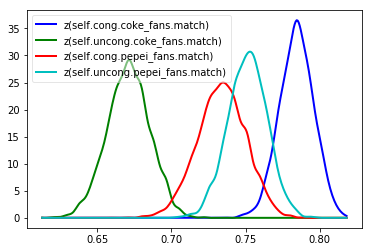

In [34]:
z1,z2,z3,z4=M_match_m3.nodes_db.node[['z(self.cong.coke_fans.match)','z(self.uncong.coke_fans.match)','z(self.cong.pepei_fans.match)','z(self.uncong.pepei_fans.match)']]
hddm.analyze.plot_posterior_nodes([z1,z2,z3,z4])
plt.savefig('coke_m3_z')

In [35]:
print "P_(z1>z2)=",(z1.trace()>z2.trace()).mean() #coke cong vs incong
print "P_(z3<z4)=",(z3.trace()<z4.trace()).mean() #pepsi cong vs incong
print "P_(z1>z3)=",(z1.trace()>z3.trace()).mean() #coke cong vs pepsi cong
print "P_(z2>z4)=",(z2.trace()>z4.trace()).mean() #coke incong vs. pepsi incong

P_(z1>z2)= 1.0
P_(z3<z4)= 0.7952222222222223
P_(z1>z3)= 0.9946666666666667
P_(z2>z4)= 0.00011111111111111112
